In [ ]:
# mount drive https://datascience.stackexchange.com/questions/29480/uploading-images-folder-from-my-system-into-google-colab
# login with your google account and type authorization code to mount on your google drive.
import os
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Specify the directory path where `assignemnt1.ipynb` exists.
# For example, if you saved `assignment1.ipynb` in `/gdrive/My Drive/cs470/assignment1` directory,
# then set root = '/gdrive/My Drive/cs470/assignment1'
root = '/gdrive/My Drive/colab'

In [ ]:
from PIL import Image
from tqdm import tqdm
from pathlib import Path
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import requests
from torchvision.datasets import CIFAR10
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import pickle, joblib
# from sklearn.externals import joblib

#GO TO 'Prepare for Learning' CELL AFTER RUN THIS CELL

1. Data 가져오기 (데이터 처리하고 테스트용, train용 나누기)
2. model 만들기
3. train시키는 함수 만들기
4. 테스트 하기

In [ ]:
#Prapare for learning
df = pd.read_csv(root + '/new_dataframe.csv') #https://drive.google.com/file/d/1PgmcqcO5N4Rzz3lUiJ5DznawgFhzrsjL/view?usp=sharing Check this link to download csv file
new_df = pd.DataFrame()
new_df['gameId'] = df['gameId'][0:5000]
new_df['win'] = df['win'][0:5000]
new_df['diffLevel'] = df['diffLevel'][0:5000]
new_df['diffKill'] = df['diffKill'][0:5000]
new_df['diffTower'] = df['diffTower'][0:5000]
new_df['diffDragon'] = df['diffDragon'][0:5000]
new_df['diffWinrate'] = df['diffWinrate'][0:5000]
y = new_df['win']
new_df = new_df.drop(['gameId', 'win'],axis=1) #column 'win' is already in variable 'y_train', 'y_test'.


In [ ]:
#Learning - SVM
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, shuffle=True, random_state=1004)

#Convert DF to Tensor for torch, 여기서 에러나면 바로 위에 있는 셀 한번 돌리고 다시 돌려보세요 
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

#Set Model
svm_model = svm.SVC()

#Learn Model
svm_model.fit(x_train,y_train)

train_acc = svm_model.score(x_train, y_train) #Accuracy for training data
test_acc = svm_model.score(x_test,y_test) #Accuracy for test data
print("Train Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)

pickle.dump(svm_model, open(root + '/svm_model.pickle','wb'))

Train Accuracy :  0.8031428571428572
Test Accuracy :  0.7986666666666666


Train Accuracy :  0.9837142857142858
Test Accuracy :  0.7633333333333333
Importance of Features
 Difference of Level   :  0.2869817155054666 
 Difference of Kill    :  0.2693910212000805 
 Difference of Tower   :  0.10178959329636542 
 Difference of Dragon  :  0.0792161570743971 
 Difference of Winrate :  0.2626215129236904


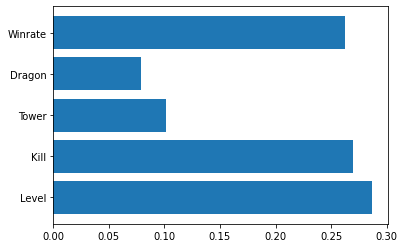

In [ ]:
#Learning - RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, shuffle=True, random_state=1004)

#Convert DF to Tensor for torch, 여기서 에러나면 바로 위에 있는 셀 한번 돌리고 다시 돌려보세요 
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

#Set Model
rf_model = RandomForestClassifier(n_estimators=10) #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier More parameters
#50 넘어가면 train accuracy가 1.0이 나옴.. 이건 over fitting일 가능성이 높아서 적당히 10~20정도면 75% 이상 찍는다

#Learn Model
rf_model.fit(x_train,y_train)

train_acc = rf_model.score(x_train, y_train) #Accuracy for training data
test_acc = rf_model.score(x_test,y_test) #Accuracy for test data
print("Train Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)

pickle.dump(rf_model, open(root + '/rf_model.pickle','wb'))

print("Importance of Features\n",
      "Difference of Level   : ",rf_model.feature_importances_[0], "\n",
      "Difference of Kill    : ",rf_model.feature_importances_[1], "\n",
      "Difference of Tower   : ",rf_model.feature_importances_[2], "\n",
      "Difference of Dragon  : ",rf_model.feature_importances_[3], "\n",
      "Difference of Winrate : ",rf_model.feature_importances_[4])

plot = plt.barh(range(5),rf_model.feature_importances_,align='center')
plot = plt.yticks(range(5),['Level','Kill','Tower','Dragon','Winrate'])

Train Accuracy :  0.8557142857142858
Test Accuracy :  0.7713333333333333
Importance of Features
 Difference of Level   :  0.21026151633819765 
 Difference of Kill    :  0.5840351066080498 
 Difference of Tower   :  0.052703897648066905 
 Difference of Dragon  :  0.04525895776766698 
 Difference of Winrate :  0.10774052163801863


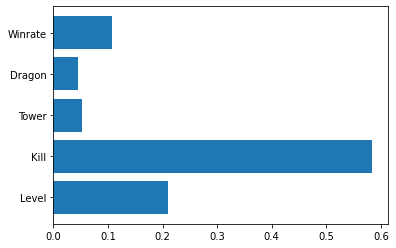

In [ ]:
#Learning - GradientBoostingClassifier
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, shuffle=True, random_state=1004)

#Convert DF to Tensor for torch, 여기서 에러나면 바로 위에 있는 셀 한번 돌리고 다시 돌려보세요 
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

#Set Model
gd_model = GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_depth=5)

#Learn Model
gd_model.fit(x_train,y_train)

train_acc = gd_model.score(x_train, y_train) #Accuracy for training data
test_acc = gd_model.score(x_test,y_test) #Accuracy for test data
print("Train Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)

pickle.dump(gd_model, open(root + '/gd_model.pickle','wb'))

print("Importance of Features\n",
      "Difference of Level   : ",gd_model.feature_importances_[0], "\n",
      "Difference of Kill    : ",gd_model.feature_importances_[1], "\n",
      "Difference of Tower   : ",gd_model.feature_importances_[2], "\n",
      "Difference of Dragon  : ",gd_model.feature_importances_[3], "\n",
      "Difference of Winrate : ",gd_model.feature_importances_[4])

plot = plt.barh(range(5),gd_model.feature_importances_,align='center')
plot = plt.yticks(range(5),['Level','Kill','Tower','Dragon','Winrate'])

In [ ]:
#Learning - KNN
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, shuffle=True, random_state=1004)

#Convert DF to Tensor for torch, 여기서 에러나면 바로 위에 있는 셀 한번 돌리고 다시 돌려보세요 
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

#Set Model
knn_model = KNeighborsClassifier()

#Learn Model
knn_model.fit(x_train,y_train)

train_acc = knn_model.score(x_train, y_train) #Accuracy for training data
test_acc = knn_model.score(x_test,y_test) #Accuracy for test data
print("Train Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)

pickle.dump(knn_model, open(root + '/knn_model.pickle','wb'))

Train Accuracy :  0.8402857142857143
Test Accuracy :  0.7553333333333333


In [ ]:
#Non-linear Model
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, shuffle=True, random_state=1004)

#Convert DF to Tensor for torch
x_train = torch.tensor(x_train.values)
x_test = torch.tensor(x_test.values)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

ml_model_identity = MLPClassifier(hidden_layer_sizes=(10,), activation='identity') #relu 안한 이유.. 우리는 -도 중요한 부분이라 안됨.
ml_model_logistic = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic')
ml_model_tanh = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh')
ml_model_relu = MLPClassifier(hidden_layer_sizes=(10,), activation='relu')

ml_model_identity.fit(x_train, y_train)
ml_model_logistic.fit(x_train, y_train)
ml_model_tanh.fit(x_train, y_train)
ml_model_relu.fit(x_train, y_train)

train_acc = ml_model_identity.score(x_train,y_train)
test_acc = ml_model_identity.score(x_test,y_test)
prob_acc = ml_model_identity.predict_log_proba(x_test)
print("========IDENTITY=========")
print("Train Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)
print(prob_acc)

pickle.dump(ml_model_identity, open(root + '/ml_model_identity.pickle','wb'))

train_acc = ml_model_logistic.score(x_train,y_train)
test_acc = ml_model_logistic.score(x_test,y_test)
prob_acc = ml_model_logistic.predict_log_proba(x_test)
print("========LOGISTIC=========")
print("Train Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)
print(prob_acc)

pickle.dump(ml_model_logistic, open(root + '/ml_model_logistic.pickle','wb'))

train_acc = ml_model_tanh.score(x_train,y_train)
test_acc = ml_model_tanh.score(x_test,y_test)
prob_acc = ml_model_tanh.predict_log_proba(x_test)
print("========TANGENTH=========")
print("Train Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)
print(prob_acc)

pickle.dump(ml_model_tanh, open(root + '/ml_model_tanh.pickle','wb'))

train_acc = ml_model_relu.score(x_train,y_train)
test_acc = ml_model_relu.score(x_test,y_test)
prob_acc = ml_model_relu.predict_log_proba(x_test)
print("========RELU=========")
print("Train Accuracy : ",train_acc)
print("Test Accuracy : ",test_acc)
print(prob_acc)

pickle.dump(ml_model_relu, open(root + '/ml_model_relu.pickle','wb'))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


========IDENTITY=========
Train Accuracy :  0.8
Test Accuracy :  0.8113333333333334
[[-1.48541491 -0.25671117]
 [-0.44834308 -1.01800658]
 [-2.46061616 -0.08924914]
 ...
 [-0.78105061 -0.61235028]
 [-0.78766426 -0.6067972 ]
 [-3.07797246 -0.04714668]]
========LOGISTIC=========
Train Accuracy :  0.8
Test Accuracy :  0.806
[[-1.60582196 -0.22404959]
 [-0.45593079 -1.00473324]
 [-2.27027718 -0.10901557]
 ...
 [-0.75033972 -0.63904943]
 [-0.88469325 -0.53245927]
 [-2.63342202 -0.07454278]]
========TANGENTH=========
Train Accuracy :  0.7991428571428572
Test Accuracy :  0.8053333333333333
[[-1.68432997 -0.20526523]
 [-0.42555741 -1.05959968]
 [-2.53564344 -0.08252408]
 ...
 [-0.732727   -0.65507446]
 [-0.98046799 -0.47022045]
 [-3.01834035 -0.05011744]]
========RELU=========
Train Accuracy :  0.8037142857142857
Test Accuracy :  0.8033333333333333
[[-1.28784987 -0.32277508]
 [-0.46561751 -0.98818248]
 [-2.04863494 -0.13801084]
 ...
 [-0.79222834 -0.60300414]
 [-0.77040567 -0.62143187]
 [-3.13